## 라이브러리 import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

## 데이터 로드

In [4]:
X_train, X_test, Y_train, Y_test = np.load('/content/datasets/news_data_max_27_size_24151.npy', allow_pickle=True)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(24367, 27) (2708, 27) (24367, 6) (2708, 6)


## 모델생성

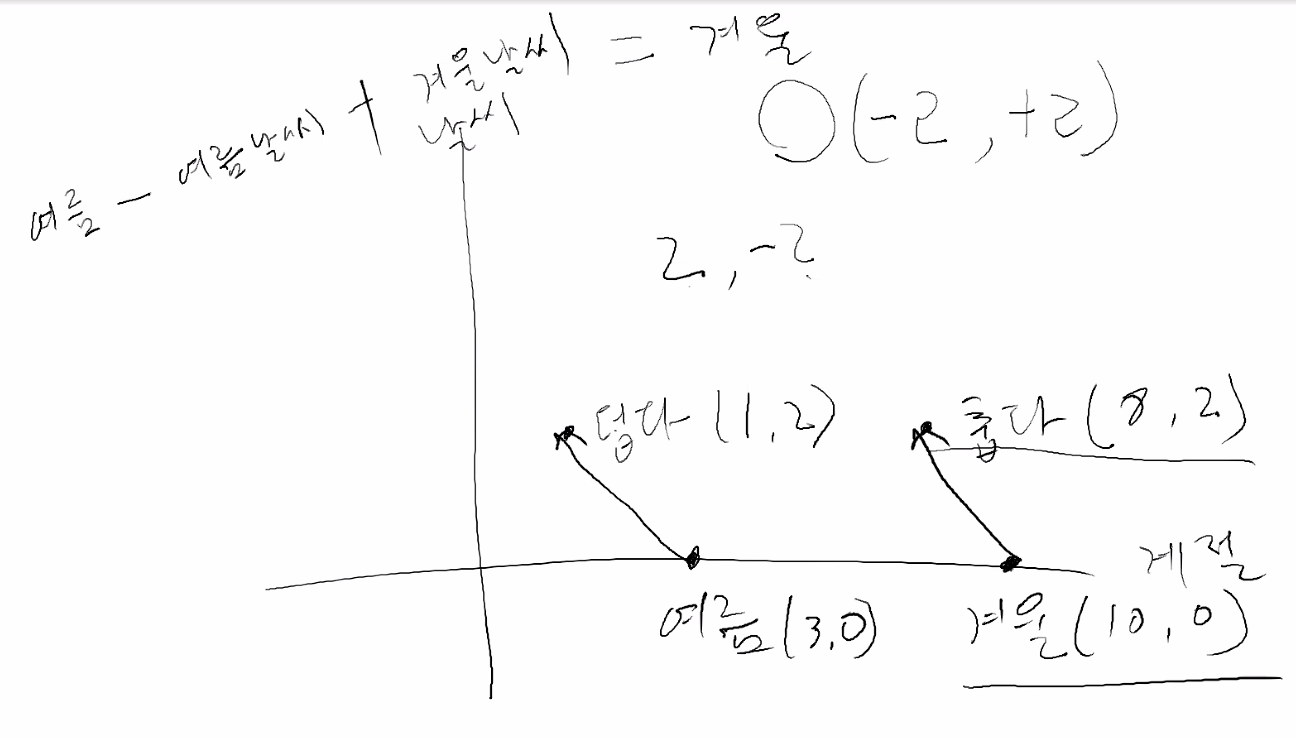

In [5]:
model = Sequential()
model.add(Embedding(input_dim=24151,  # 단어들을 벡터공간에 배치 / 의미상 유사한 단어들은 가까운 지점으로 매핑 / 연산 가능해짐 / 복잡하고 연산량 많음
                    output_dim=300,  # 차원 축소 / 데이터 학습을 위해 차원이 증가하면서 학습데이터 수가 차원의 수보다 적어져 성능이 저하 -> 차원의 저주
                    input_length=27))  # CNN의 input_shape과 같음
model.add(Conv1D(32, kernel_size=5, padding='same', activation='relu'))  # 주변 값과의 연관성을 분석하기 위해 사용
model.add(MaxPool1D(pool_size=1))  # 그냥 Conv 친구라 ㅎㅎ
model.add(LSTM(128, activation='tanh', return_sequences=True))  # 뒷단에 LSTM을 다시 사용하기 위해 return_sequences=True / 16개의 단어 모두 전달하기 위해
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 27, 300)           7245300   
_________________________________________________________________
conv1d (Conv1D)              (None, 27, 32)            48032     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 27, 128)           82432     
_________________________________________________________________
dropout (Dropout)            (None, 27, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 27, 64)            49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 64)            0

## 모델 학습

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=100, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
244/244 [==============================] - 63s 119ms/step - loss: 1.2252 - accuracy: 0.5210 - val_loss: 0.8016 - val_accuracy: 0.7234
Epoch 2/8
244/244 [==============================] - 28s 114ms/step - loss: 0.6260 - accuracy: 0.7939 - val_loss: 0.7353 - val_accuracy: 0.7611
Epoch 3/8
244/244 [==============================] - 27s 112ms/step - loss: 0.3841 - accuracy: 0.8818 - val_loss: 0.8195 - val_accuracy: 0.7603
Epoch 4/8
244/244 [==============================] - 27s 113ms/step - loss: 0.2584 - accuracy: 0.9229 - val_loss: 0.8911 - val_accuracy: 0.7518
Epoch 5/8
244/244 [==============================] - 28s 114ms/step - loss: 0.1823 - accuracy: 0.9484 - val_loss: 0.9760 - val_accuracy: 0.7555
Epoch 6/8
244/244 [==============================] - 28s 115ms/step - loss: 0.1353 - accuracy: 0.9611 - val_loss: 1.0658 - val_accuracy: 0.7500
Epoch 7/8
244/244 [==============================] - 28s 114ms/step - loss: 0.1042 - accuracy: 0.9689 - val_loss: 1.2366 - val_accuracy:

## 모델 검증 및 저장

In [7]:
score = model.evaluate(X_test, Y_test)
print(score[1])

85/85 [==============================] - 1s 12ms/step - loss: 1.3076 - accuracy: 0.7459
0.7459379434585571


In [8]:
model.save(f'/content/models/news_classification_{score[1]:.4f}.h5')